In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
Train_data = pd.read_csv('train_Int_MM_PCA15.csv')
Validation_data = pd.read_csv('valid_Int_MM_PCA15.csv')
Test_data = pd.read_csv('test_Int_MM_PCA15.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PC1           12000 non-null  float64
 1   PC2           12000 non-null  float64
 2   PC3           12000 non-null  float64
 3   PC4           12000 non-null  float64
 4   PC5           12000 non-null  float64
 5   PC6           12000 non-null  float64
 6   PC7           12000 non-null  float64
 7   PC8           12000 non-null  float64
 8   PC9           12000 non-null  float64
 9   PC10          12000 non-null  float64
 10  PC11          12000 non-null  float64
 11  PC12          12000 non-null  float64
 12  PC13          12000 non-null  float64
 13  PC14          12000 non-null  float64
 14  PC15          12000 non-null  float64
 15  LoanApproved  12000 non-null  int64  
 16  RiskScore     12000 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 1.6 MB


In [4]:
Train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,LoanApproved,RiskScore
0,-0.412651,0.084086,0.282528,-0.393400,-0.096727,0.393623,-0.103533,0.098367,-0.313214,-0.013962,-0.074108,-0.287169,0.161454,0.360753,0.129990,0,0.402174
1,-0.177765,0.031687,0.220899,0.010585,-0.042097,-0.534274,0.271388,0.394490,-0.065320,0.194361,-0.043839,-0.142310,0.154376,-0.110080,0.119097,0,0.384058
2,0.075380,-0.140120,-0.233582,0.085041,-0.253663,-0.209136,-0.191891,0.494238,-0.013998,-0.162744,-0.048602,0.308490,-0.148155,-0.075608,0.089184,0,0.438406
3,0.598926,-0.203006,0.054247,-0.085631,0.062238,0.238745,-0.549751,-0.151796,0.010523,0.218145,-0.083986,-0.005491,-0.102736,-0.411824,-0.049605,1,0.086957
4,0.089788,-0.029256,0.082212,-0.036527,-0.274680,-0.538655,-0.136887,-0.148626,0.186360,-0.124184,-0.057235,0.116438,-0.106489,0.006368,0.109196,0,0.438406


In [6]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [7]:
y_training.min()

0

In [8]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [9]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [10]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [11]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [12]:
print(y_training)

[0 0 0 ... 1 0 0]


In [13]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [14]:
print(X_training.shape)

(12000, 15)


Training Losses are 
          0
0  0.807750
1  0.805773
2  0.803804
3  0.801843
4  0.799890
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021



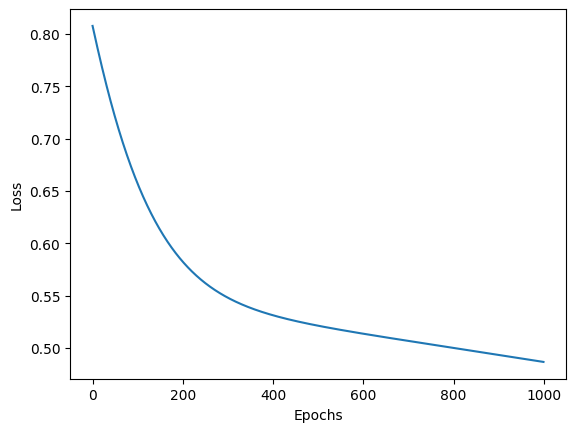

Training Losses are 
          0
0  0.728749
1  0.725973
2  0.723221
3  0.720494
4  0.717791
Validation Data
Confusion Matrix for hidden layer 16
[[3008   36]
 [ 834  122]]
Accuracy: 0.7825, Precision: 0.7722, Recall: 0.1276, F1-score: 0.2190

Test Data
Confusion Matrix for hiden layer 16
[[3009   35]
 [ 822  134]]
Accuracy: 0.7857, Precision: 0.7929, Recall: 0.1402, F1-score: 0.2382



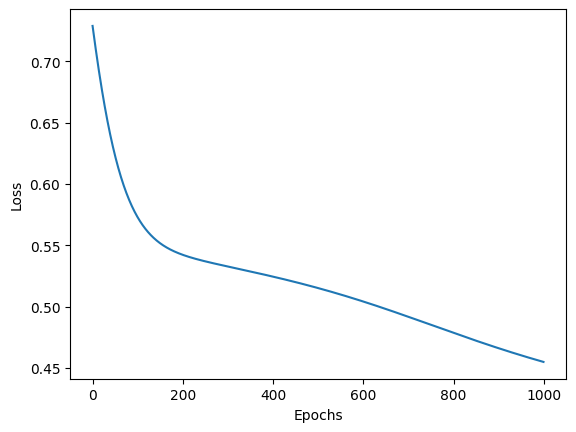

Training Losses are 
          0
0  0.664708
1  0.660615
2  0.656598
3  0.652659
4  0.648799
Validation Data
Confusion Matrix for hidden layer 32
[[2920  124]
 [ 636  320]]
Accuracy: 0.8100, Precision: 0.7207, Recall: 0.3347, F1-score: 0.4571

Test Data
Confusion Matrix for hiden layer 32
[[2918  126]
 [ 637  319]]
Accuracy: 0.8093, Precision: 0.7169, Recall: 0.3337, F1-score: 0.4554



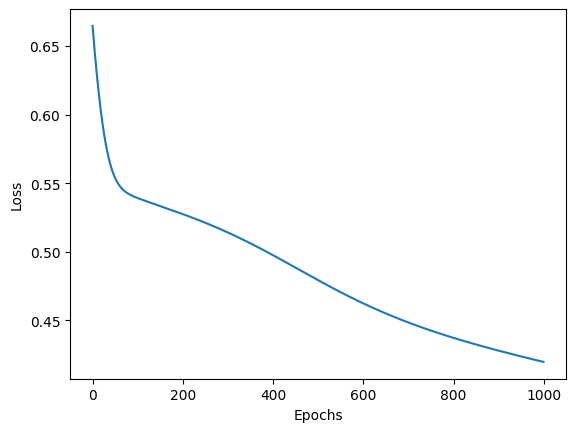

Training Losses are 
          0
0  0.645476
1  0.638312
2  0.631440
3  0.624862
4  0.618581
Validation Data
Confusion Matrix for hidden layer 64
[[2915  129]
 [ 539  417]]
Accuracy: 0.8330, Precision: 0.7637, Recall: 0.4362, F1-score: 0.5553

Test Data
Confusion Matrix for hiden layer 64
[[2901  143]
 [ 541  415]]
Accuracy: 0.8290, Precision: 0.7437, Recall: 0.4341, F1-score: 0.5482



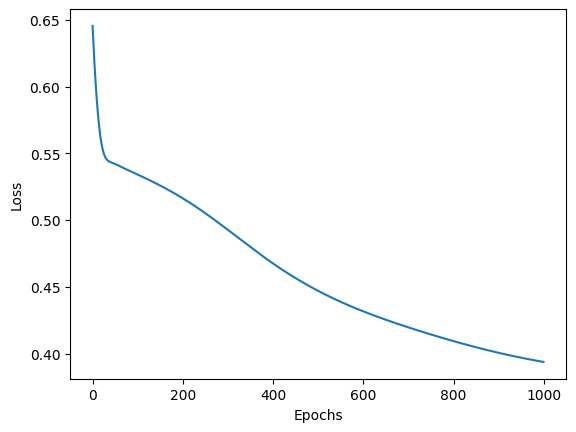

Training Losses are 
          0
0  0.696393
1  0.679048
2  0.662851
3  0.647815
4  0.633946
Validation Data
Confusion Matrix for hidden layer 128
[[2893  151]
 [ 498  458]]
Accuracy: 0.8377, Precision: 0.7521, Recall: 0.4791, F1-score: 0.5853

Test Data
Confusion Matrix for hiden layer 128
[[2877  167]
 [ 492  464]]
Accuracy: 0.8353, Precision: 0.7353, Recall: 0.4854, F1-score: 0.5848



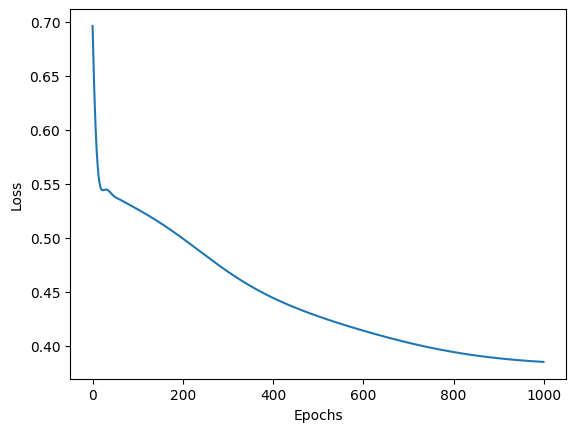

Best accuracy for test data is 0.83525 for degree 128


In [15]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(15,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [16]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.593822
1  0.592919
2  0.592024
3  0.591140
4  0.590265
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[2947   97]
 [ 723  233]]
Accuracy: 0.7950, Precision: 0.7061, Recall: 0.2437, F1-score: 0.3624

Test Data
Confusion Matrix for hiden layer 8 and 8
[[2955   89]
 [ 712  244]]
Accuracy: 0.7997, Precision: 0.7327, Recall: 0.2552, F1-score: 0.3786



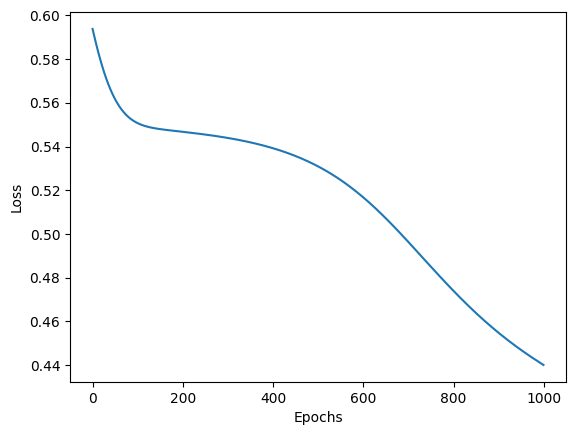

Training Losses are 
          0
0  0.700994
1  0.697861
2  0.694762
3  0.691697
4  0.688668
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


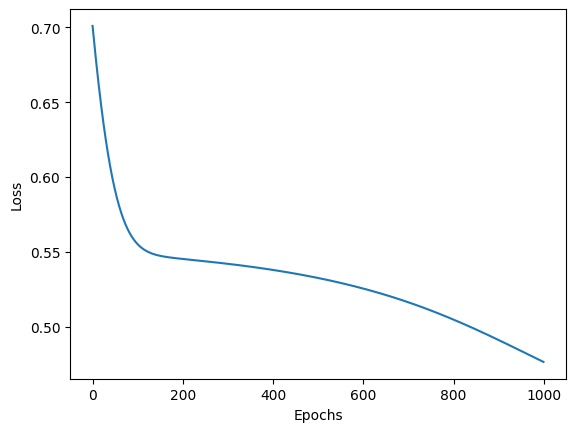

Training Losses are 
          0
0  0.741047
1  0.734964
2  0.728987
3  0.723118
4  0.717358
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2919  125]
 [ 674  282]]
Accuracy: 0.8003, Precision: 0.6929, Recall: 0.2950, F1-score: 0.4138

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2933  111]
 [ 682  274]]
Accuracy: 0.8017, Precision: 0.7117, Recall: 0.2866, F1-score: 0.4087



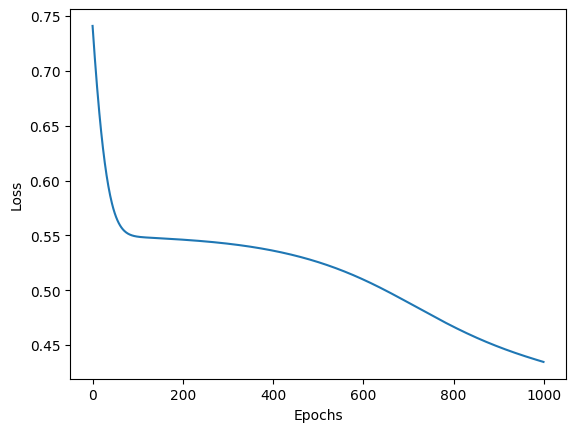

Training Losses are 
          0
0  0.637326
1  0.630063
2  0.623140
3  0.616560
4  0.610327
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2889  155]
 [ 489  467]]
Accuracy: 0.8390, Precision: 0.7508, Recall: 0.4885, F1-score: 0.5919

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2868  176]
 [ 480  476]]
Accuracy: 0.8360, Precision: 0.7301, Recall: 0.4979, F1-score: 0.5920



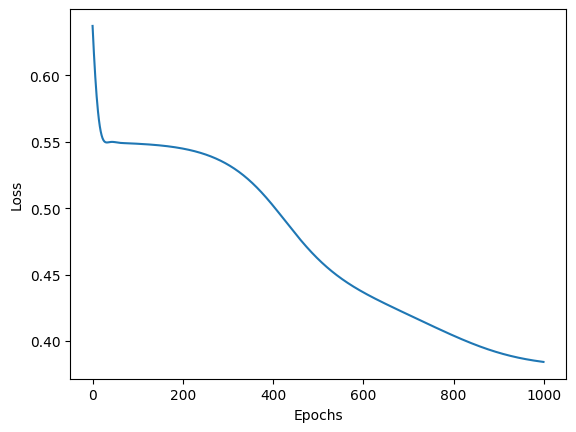

Training Losses are 
          0
0  0.627834
1  0.626255
2  0.624693
3  0.623150
4  0.621625
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3029   15]
 [ 870   86]]
Accuracy: 0.7788, Precision: 0.8515, Recall: 0.0900, F1-score: 0.1627

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3029   15]
 [ 865   91]]
Accuracy: 0.7800, Precision: 0.8585, Recall: 0.0952, F1-score: 0.1714



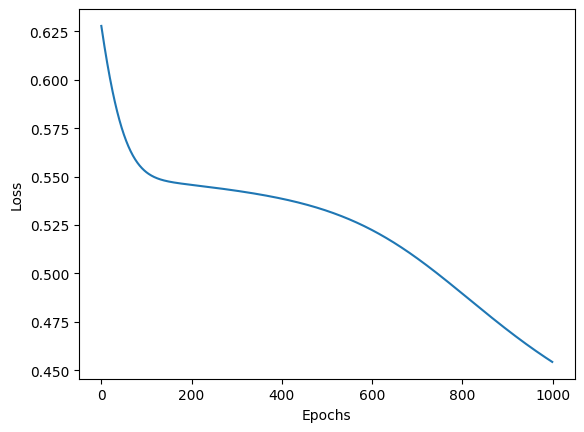

Training Losses are 
          0
0  0.640465
1  0.637750
2  0.635082
3  0.632462
4  0.629889
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2904  140]
 [ 634  322]]
Accuracy: 0.8065, Precision: 0.6970, Recall: 0.3368, F1-score: 0.4542

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2911  133]
 [ 635  321]]
Accuracy: 0.8080, Precision: 0.7070, Recall: 0.3358, F1-score: 0.4553



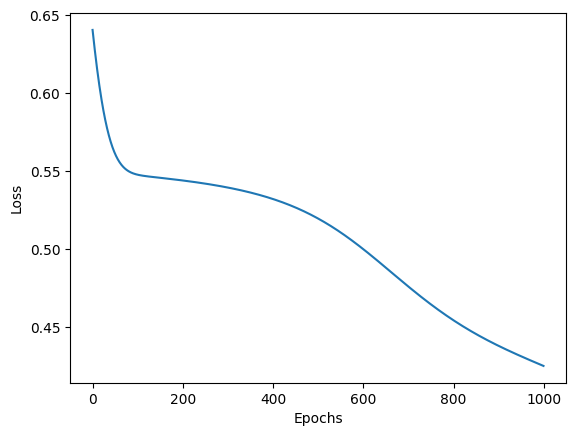

Training Losses are 
          0
0  0.692599
1  0.686900
2  0.681332
3  0.675897
4  0.670595
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2903  141]
 [ 549  407]]
Accuracy: 0.8275, Precision: 0.7427, Recall: 0.4257, F1-score: 0.5412

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2888  156]
 [ 548  408]]
Accuracy: 0.8240, Precision: 0.7234, Recall: 0.4268, F1-score: 0.5368



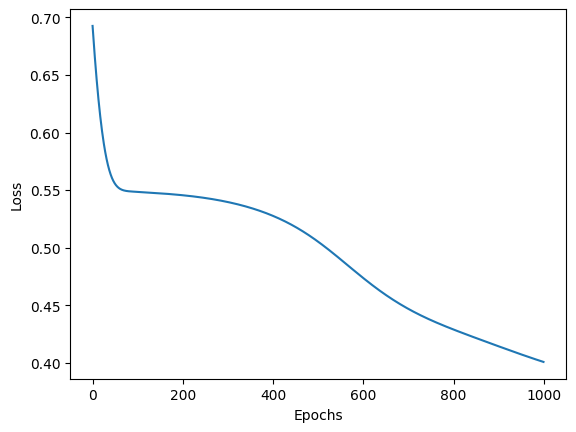

Training Losses are 
          0
0  0.754589
1  0.741440
2  0.728757
3  0.716549
4  0.704824
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2900  144]
 [ 590  366]]
Accuracy: 0.8165, Precision: 0.7176, Recall: 0.3828, F1-score: 0.4993

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2894  150]
 [ 587  369]]
Accuracy: 0.8157, Precision: 0.7110, Recall: 0.3860, F1-score: 0.5003



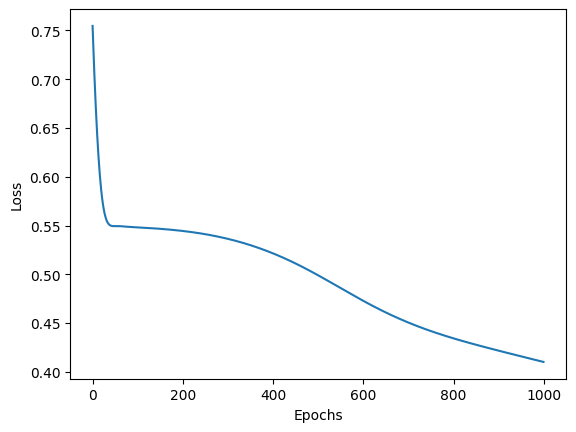

Training Losses are 
          0
0  0.966304
1  0.960907
2  0.955550
3  0.950236
4  0.944966
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


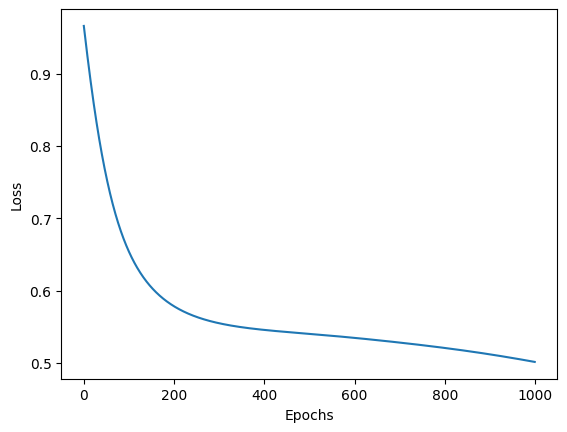

Training Losses are 
          0
0  0.716560
1  0.711403
2  0.706344
3  0.701382
4  0.696519
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2903  141]
 [ 601  355]]
Accuracy: 0.8145, Precision: 0.7157, Recall: 0.3713, F1-score: 0.4890

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2900  144]
 [ 601  355]]
Accuracy: 0.8137, Precision: 0.7114, Recall: 0.3713, F1-score: 0.4880



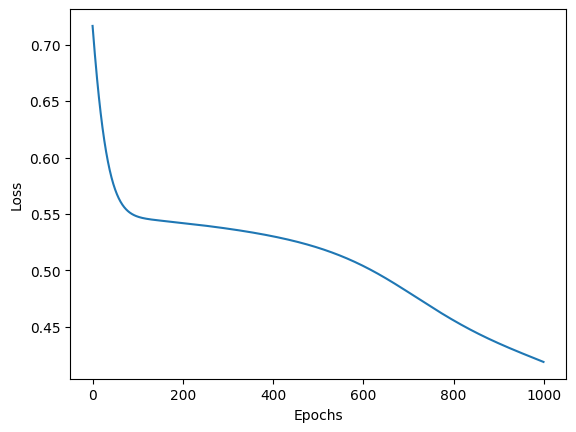

Training Losses are 
          0
0  0.760071
1  0.750840
2  0.741850
3  0.733105
4  0.724604
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2901  143]
 [ 590  366]]
Accuracy: 0.8167, Precision: 0.7191, Recall: 0.3828, F1-score: 0.4997

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2889  155]
 [ 588  368]]
Accuracy: 0.8143, Precision: 0.7036, Recall: 0.3849, F1-score: 0.4976



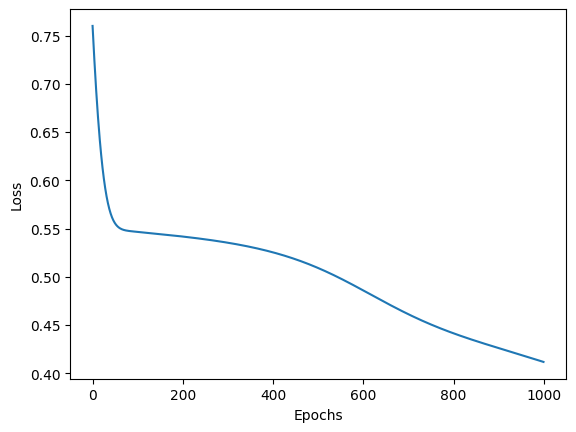

Training Losses are 
          0
0  0.778010
1  0.761863
2  0.746353
3  0.731490
4  0.717286
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2874  170]
 [ 465  491]]
Accuracy: 0.8413, Precision: 0.7428, Recall: 0.5136, F1-score: 0.6073

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2851  193]
 [ 458  498]]
Accuracy: 0.8373, Precision: 0.7207, Recall: 0.5209, F1-score: 0.6047



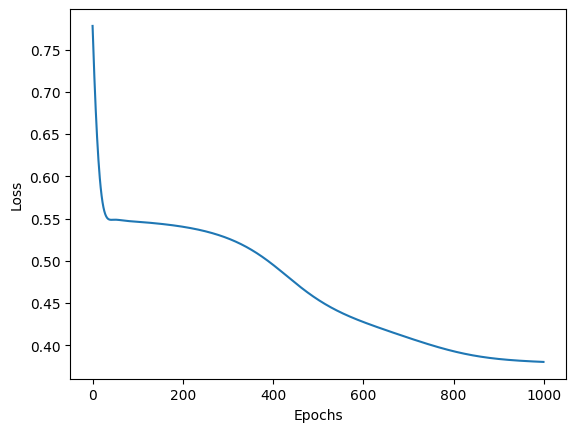

Training Losses are 
          0
0  0.791585
1  0.785885
2  0.780254
3  0.774693
4  0.769206
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2936  108]
 [ 608  348]]
Accuracy: 0.8210, Precision: 0.7632, Recall: 0.3640, F1-score: 0.4929

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2918  126]
 [ 611  345]]
Accuracy: 0.8157, Precision: 0.7325, Recall: 0.3609, F1-score: 0.4835



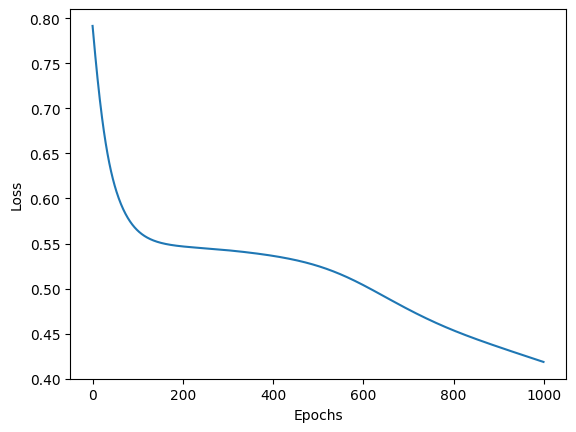

Training Losses are 
          0
0  0.620401
1  0.616267
2  0.612260
3  0.608382
4  0.604638
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2862  182]
 [ 456  500]]
Accuracy: 0.8405, Precision: 0.7331, Recall: 0.5230, F1-score: 0.6105

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2846  198]
 [ 454  502]]
Accuracy: 0.8370, Precision: 0.7171, Recall: 0.5251, F1-score: 0.6063



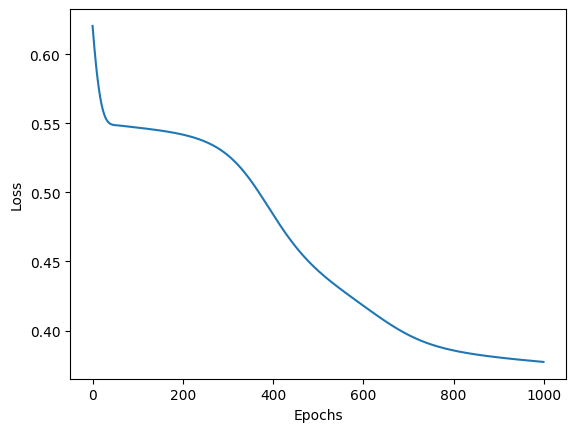

Training Losses are 
          0
0  0.720652
1  0.709337
2  0.698426
3  0.687932
4  0.677862
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2863  181]
 [ 453  503]]
Accuracy: 0.8415, Precision: 0.7354, Recall: 0.5262, F1-score: 0.6134

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2845  199]
 [ 452  504]]
Accuracy: 0.8373, Precision: 0.7169, Recall: 0.5272, F1-score: 0.6076



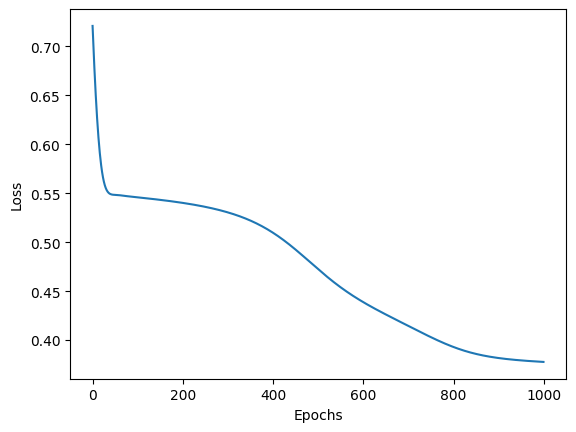

Training Losses are 
          0
0  0.668150
1  0.653586
2  0.640051
3  0.627552
4  0.616094
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2859  185]
 [ 458  498]]
Accuracy: 0.8393, Precision: 0.7291, Recall: 0.5209, F1-score: 0.6077

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2846  198]
 [ 449  507]]
Accuracy: 0.8383, Precision: 0.7191, Recall: 0.5303, F1-score: 0.6105



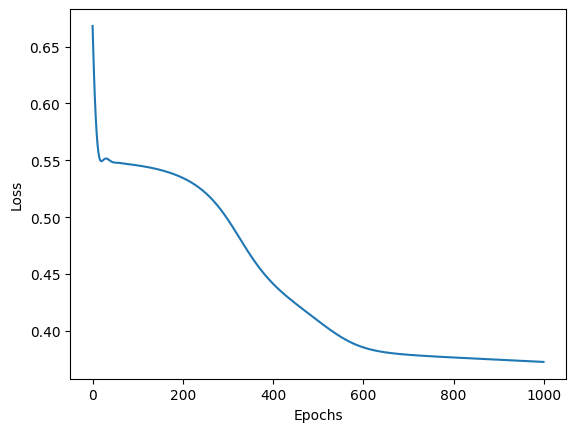

Best accuracy for test data is 0.83825 for degree 64 & 64


In [17]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(15,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [18]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.621604
1  0.620445
2  0.619294
3  0.618152
4  0.617018
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3013   31]
 [ 834  122]]
Accuracy: 0.7837, Precision: 0.7974, Recall: 0.1276, F1-score: 0.2200

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3012   32]
 [ 824  132]]
Accuracy: 0.7860, Precision: 0.8049, Recall: 0.1381, F1-score: 0.2357



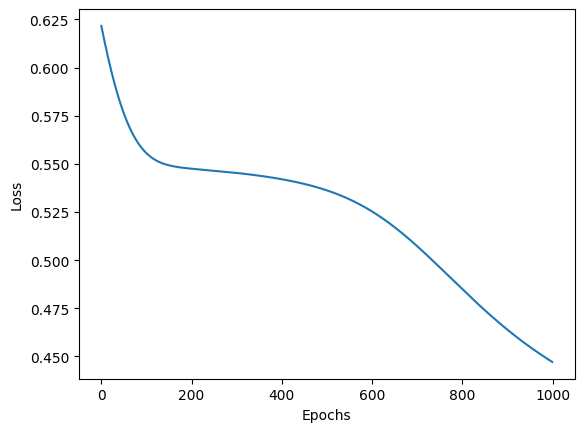

Training Losses are 
          0
0  0.826488
1  0.823789
2  0.821107
3  0.818443
4  0.815796
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


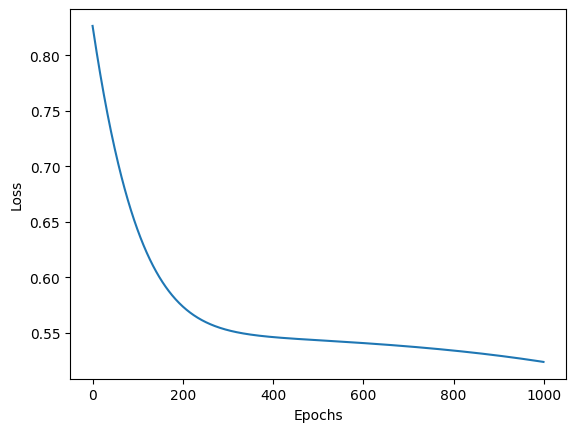

Training Losses are 
          0
0  1.020675
1  1.017583
2  1.014508
3  1.011450
4  1.008408
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


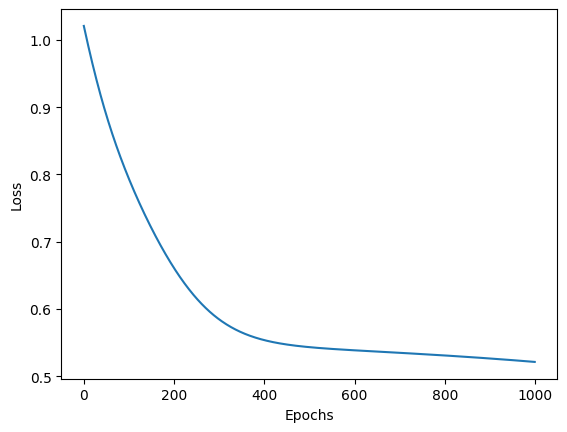

Training Losses are 
          0
0  0.813233
1  0.810717
2  0.808212
3  0.805718
4  0.803234
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


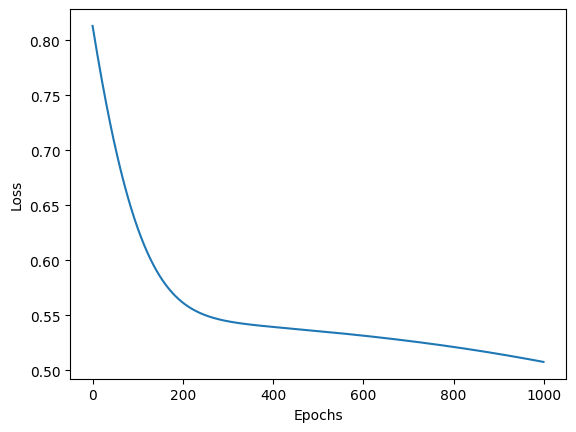

Training Losses are 
          0
0  0.731917
1  0.728663
2  0.725441
3  0.722253
4  0.719098
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3040    4]
 [ 925   31]]
Accuracy: 0.7678, Precision: 0.8857, Recall: 0.0324, F1-score: 0.0626

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3039    5]
 [ 918   38]]
Accuracy: 0.7692, Precision: 0.8837, Recall: 0.0397, F1-score: 0.0761



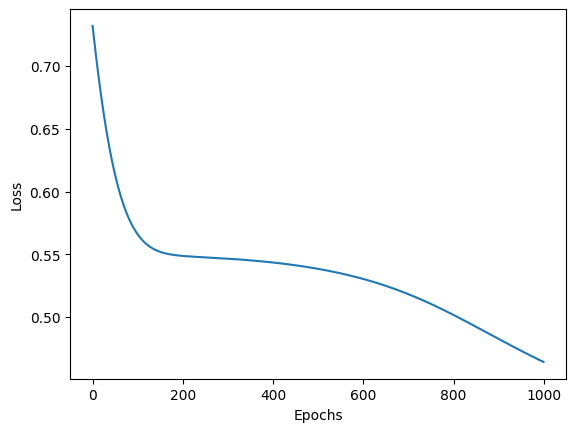

Training Losses are 
          0
0  0.767582
1  0.763903
2  0.760256
3  0.756640
4  0.753056
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3041    3]
 [ 931   25]]
Accuracy: 0.7665, Precision: 0.8929, Recall: 0.0262, F1-score: 0.0508

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3040    4]
 [ 926   30]]
Accuracy: 0.7675, Precision: 0.8824, Recall: 0.0314, F1-score: 0.0606



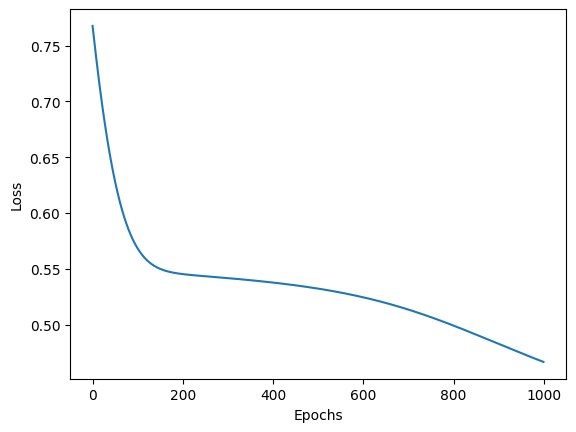

Training Losses are 
          0
0  0.640538
1  0.638364
2  0.636218
3  0.634101
4  0.632011
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[2903  141]
 [ 636  320]]
Accuracy: 0.8057, Precision: 0.6941, Recall: 0.3347, F1-score: 0.4517

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[2911  133]
 [ 637  319]]
Accuracy: 0.8075, Precision: 0.7058, Recall: 0.3337, F1-score: 0.4531



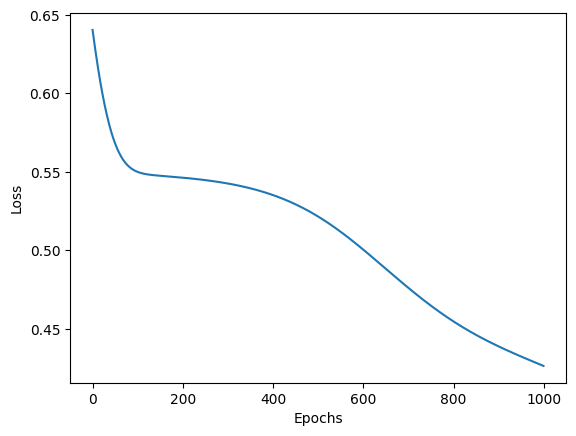

Training Losses are 
          0
0  0.619601
1  0.617398
2  0.615232
3  0.613104
4  0.611015
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2920  124]
 [ 685  271]]
Accuracy: 0.7977, Precision: 0.6861, Recall: 0.2835, F1-score: 0.4012

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2937  107]
 [ 688  268]]
Accuracy: 0.8013, Precision: 0.7147, Recall: 0.2803, F1-score: 0.4027



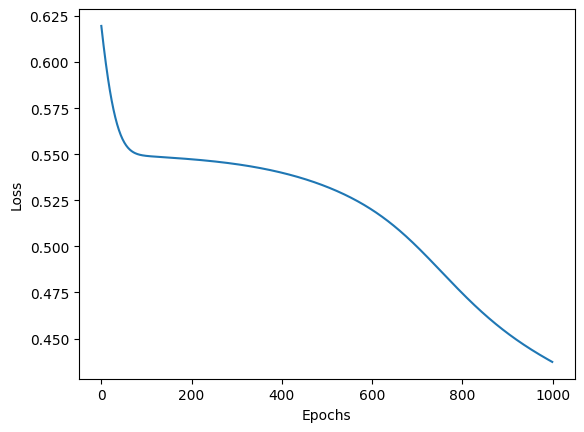

Training Losses are 
          0
0  0.674687
1  0.669786
2  0.664993
3  0.660308
4  0.655735
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2920  124]
 [ 676  280]]
Accuracy: 0.8000, Precision: 0.6931, Recall: 0.2929, F1-score: 0.4118

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2934  110]
 [ 680  276]]
Accuracy: 0.8025, Precision: 0.7150, Recall: 0.2887, F1-score: 0.4113



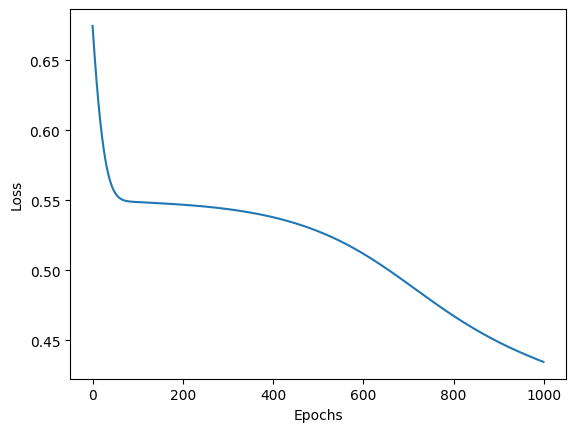

Training Losses are 
          0
0  0.663566
1  0.659002
2  0.654540
3  0.650181
4  0.645928
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2894  150]
 [ 587  369]]
Accuracy: 0.8157, Precision: 0.7110, Recall: 0.3860, F1-score: 0.5003

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2888  156]
 [ 587  369]]
Accuracy: 0.8143, Precision: 0.7029, Recall: 0.3860, F1-score: 0.4983



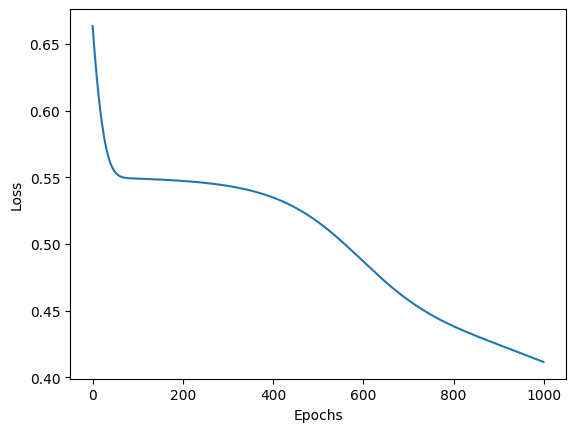

Training Losses are 
          0
0  0.696041
1  0.690762
2  0.685586
3  0.680515
4  0.675550
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2961   83]
 [ 742  214]]
Accuracy: 0.7937, Precision: 0.7205, Recall: 0.2238, F1-score: 0.3416

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2960   84]
 [ 732  224]]
Accuracy: 0.7960, Precision: 0.7273, Recall: 0.2343, F1-score: 0.3544



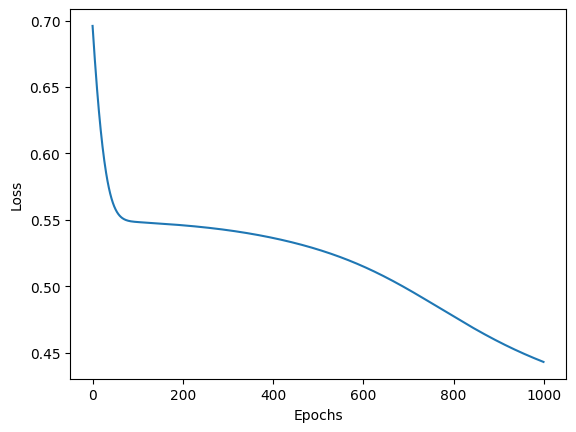

Training Losses are 
          0
0  0.848769
1  0.840890
2  0.833121
3  0.825464
4  0.817921
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3021   23]
 [ 857   99]]
Accuracy: 0.7800, Precision: 0.8115, Recall: 0.1036, F1-score: 0.1837

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3017   27]
 [ 846  110]]
Accuracy: 0.7817, Precision: 0.8029, Recall: 0.1151, F1-score: 0.2013



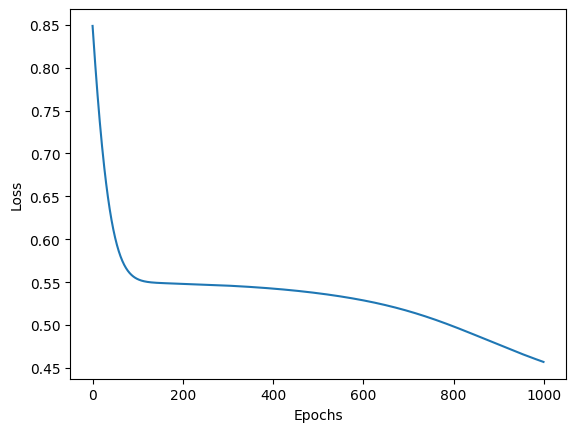

Training Losses are 
          0
0  0.713232
1  0.702490
2  0.692138
3  0.682183
4  0.672628
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2896  148]
 [ 594  362]]
Accuracy: 0.8145, Precision: 0.7098, Recall: 0.3787, F1-score: 0.4939

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2893  151]
 [ 594  362]]
Accuracy: 0.8137, Precision: 0.7057, Recall: 0.3787, F1-score: 0.4929



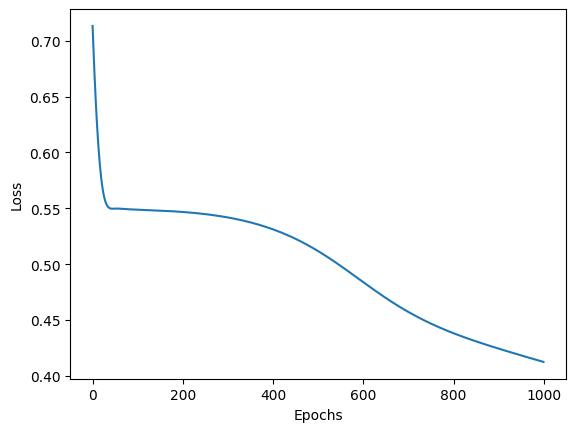

Training Losses are 
          0
0  0.584714
1  0.580266
2  0.576144
3  0.572350
4  0.568883
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2867  177]
 [ 461  495]]
Accuracy: 0.8405, Precision: 0.7366, Recall: 0.5178, F1-score: 0.6081

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2847  197]
 [ 458  498]]
Accuracy: 0.8363, Precision: 0.7165, Recall: 0.5209, F1-score: 0.6033



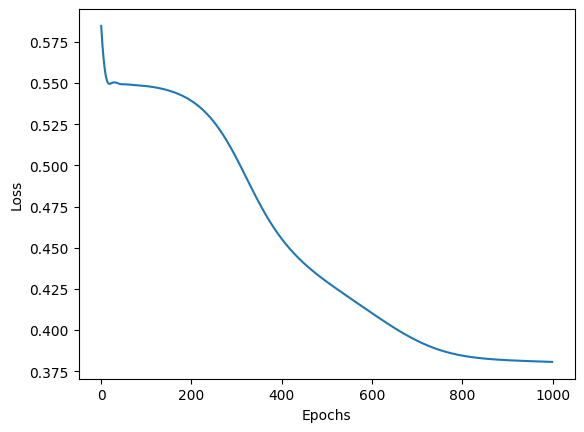

Training Losses are 
          0
0  0.668677
1  0.659938
2  0.651564
3  0.643557
4  0.635923
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2894  150]
 [ 529  427]]
Accuracy: 0.8303, Precision: 0.7400, Recall: 0.4467, F1-score: 0.5571

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2880  164]
 [ 529  427]]
Accuracy: 0.8267, Precision: 0.7225, Recall: 0.4467, F1-score: 0.5520



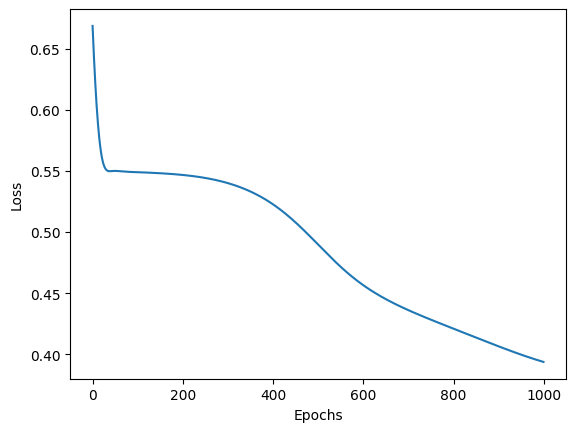

Training Losses are 
          0
0  0.794917
1  0.782455
2  0.770338
3  0.758574
4  0.747169
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2893  151]
 [ 585  371]]
Accuracy: 0.8160, Precision: 0.7107, Recall: 0.3881, F1-score: 0.5020

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2887  157]
 [ 582  374]]
Accuracy: 0.8153, Precision: 0.7043, Recall: 0.3912, F1-score: 0.5030



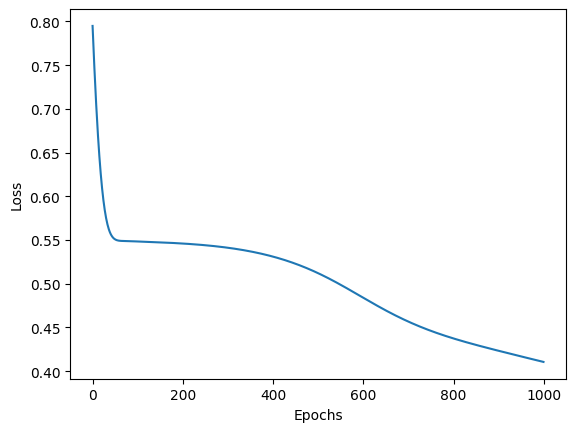

Training Losses are 
          0
0  0.692361
1  0.690302
2  0.688258
3  0.686229
4  0.684214
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021



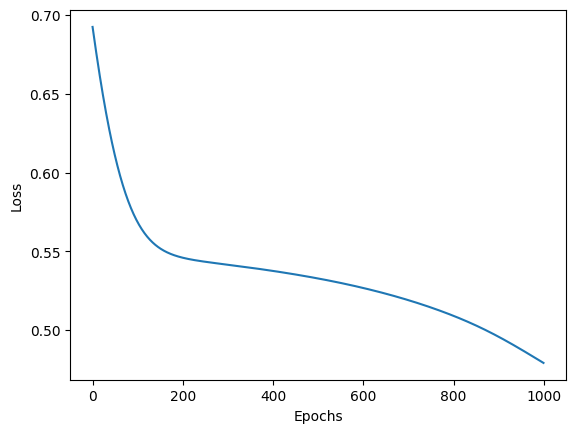

Training Losses are 
          0
0  0.569608
1  0.568991
2  0.568383
3  0.567783
4  0.567193
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2936  108]
 [ 575  381]]
Accuracy: 0.8293, Precision: 0.7791, Recall: 0.3985, F1-score: 0.5273

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[2925  119]
 [ 576  380]]
Accuracy: 0.8263, Precision: 0.7615, Recall: 0.3975, F1-score: 0.5223



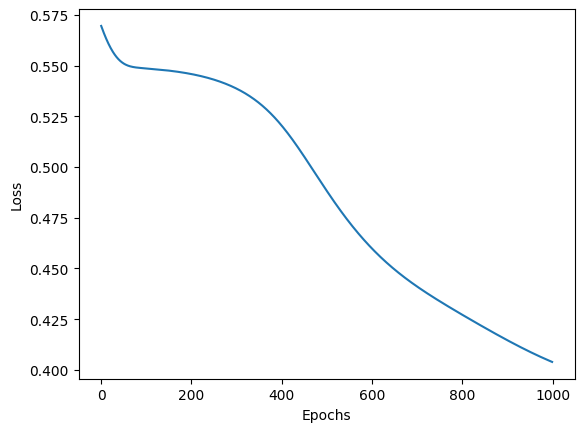

Training Losses are 
          0
0  0.712527
1  0.710358
2  0.708202
3  0.706058
4  0.703928
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 946   10]]
Accuracy: 0.7635, Precision: 1.0000, Recall: 0.0105, F1-score: 0.0207

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3042    2]
 [ 938   18]]
Accuracy: 0.7650, Precision: 0.9000, Recall: 0.0188, F1-score: 0.0369



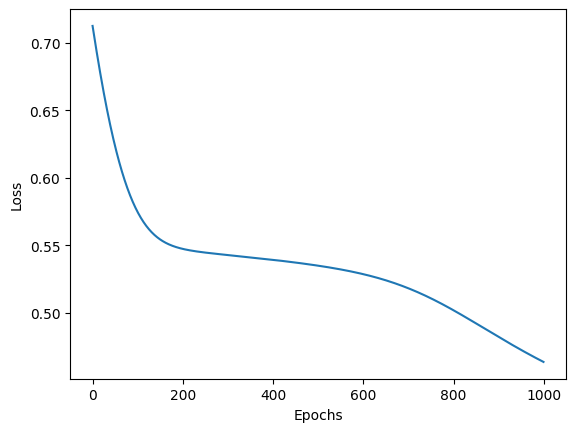

Training Losses are 
          0
0  0.673866
1  0.671934
2  0.670018
3  0.668119
4  0.666236
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 949    7]]
Accuracy: 0.7628, Precision: 1.0000, Recall: 0.0073, F1-score: 0.0145

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3042    2]
 [ 942   14]]
Accuracy: 0.7640, Precision: 0.8750, Recall: 0.0146, F1-score: 0.0288



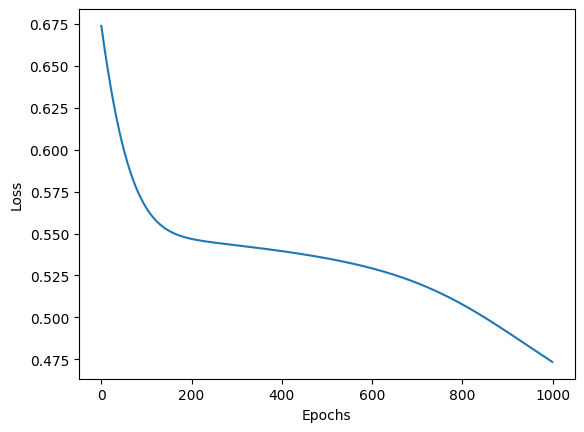

Training Losses are 
          0
0  0.807514
1  0.803245
2  0.799027
3  0.794859
4  0.790742
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3033   11]
 [ 880   76]]
Accuracy: 0.7772, Precision: 0.8736, Recall: 0.0795, F1-score: 0.1457

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3029   15]
 [ 876   80]]
Accuracy: 0.7772, Precision: 0.8421, Recall: 0.0837, F1-score: 0.1522



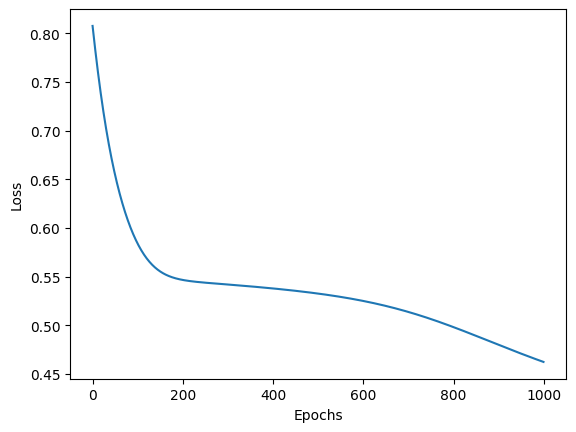

Training Losses are 
          0
0  0.679048
1  0.675515
2  0.672036
3  0.668609
4  0.665237
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2988   56]
 [ 783  173]]
Accuracy: 0.7903, Precision: 0.7555, Recall: 0.1810, F1-score: 0.2920

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2986   58]
 [ 782  174]]
Accuracy: 0.7900, Precision: 0.7500, Recall: 0.1820, F1-score: 0.2929



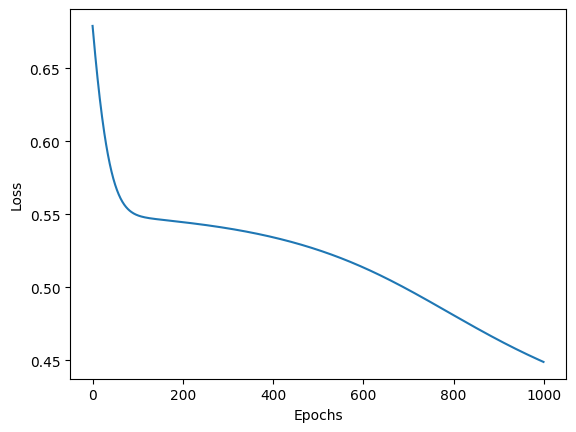

Training Losses are 
          0
0  0.659778
1  0.656628
2  0.653524
3  0.650467
4  0.647457
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2899  145]
 [ 630  326]]
Accuracy: 0.8063, Precision: 0.6921, Recall: 0.3410, F1-score: 0.4569

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2907  137]
 [ 629  327]]
Accuracy: 0.8085, Precision: 0.7047, Recall: 0.3421, F1-score: 0.4606



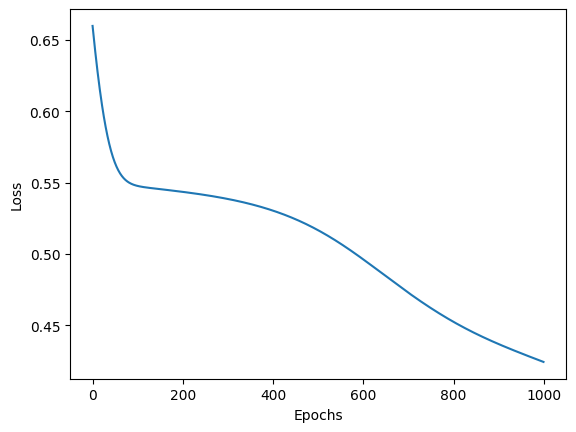

Training Losses are 
          0
0  0.655535
1  0.652510
2  0.649532
3  0.646602
4  0.643722
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2895  149]
 [ 616  340]]
Accuracy: 0.8087, Precision: 0.6953, Recall: 0.3556, F1-score: 0.4706

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2900  144]
 [ 612  344]]
Accuracy: 0.8110, Precision: 0.7049, Recall: 0.3598, F1-score: 0.4765



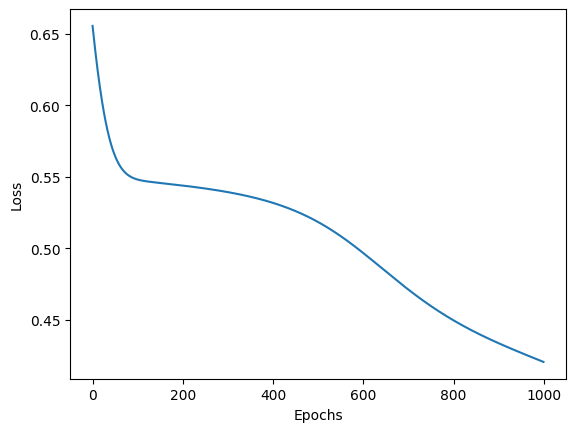

Training Losses are 
          0
0  0.599970
1  0.596697
2  0.593541
3  0.590504
4  0.587587
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2875  169]
 [ 461  495]]
Accuracy: 0.8425, Precision: 0.7455, Recall: 0.5178, F1-score: 0.6111

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2853  191]
 [ 460  496]]
Accuracy: 0.8373, Precision: 0.7220, Recall: 0.5188, F1-score: 0.6038



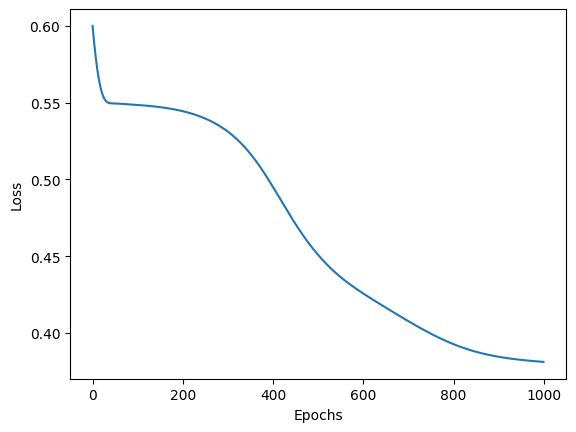

Training Losses are 
          0
0  0.628953
1  0.624351
2  0.619893
3  0.615579
4  0.611413
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2888  156]
 [ 490  466]]
Accuracy: 0.8385, Precision: 0.7492, Recall: 0.4874, F1-score: 0.5906

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2868  176]
 [ 481  475]]
Accuracy: 0.8357, Precision: 0.7296, Recall: 0.4969, F1-score: 0.5912



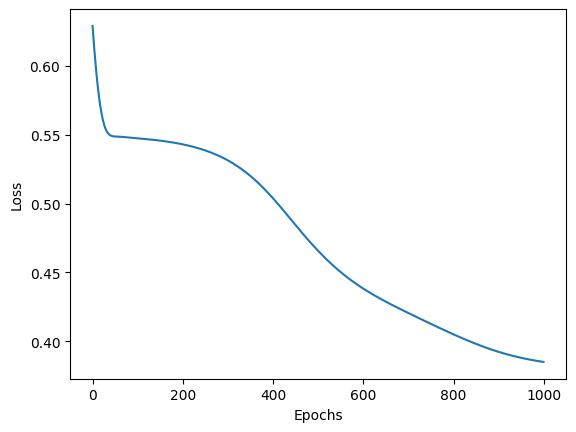

Training Losses are 
          0
0  0.611159
1  0.607375
2  0.603719
3  0.600191
4  0.596795
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2881  163]
 [ 474  482]]
Accuracy: 0.8407, Precision: 0.7473, Recall: 0.5042, F1-score: 0.6021

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2853  191]
 [ 466  490]]
Accuracy: 0.8357, Precision: 0.7195, Recall: 0.5126, F1-score: 0.5987



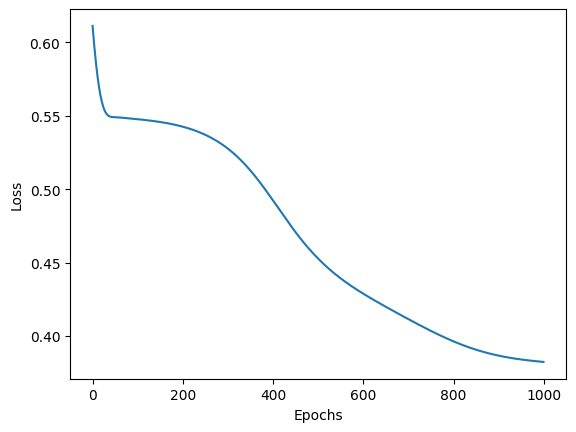

Training Losses are 
          0
0  0.671063
1  0.665633
2  0.660334
3  0.655167
4  0.650135
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2894  150]
 [ 574  382]]
Accuracy: 0.8190, Precision: 0.7180, Recall: 0.3996, F1-score: 0.5134

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2890  154]
 [ 567  389]]
Accuracy: 0.8197, Precision: 0.7164, Recall: 0.4069, F1-score: 0.5190



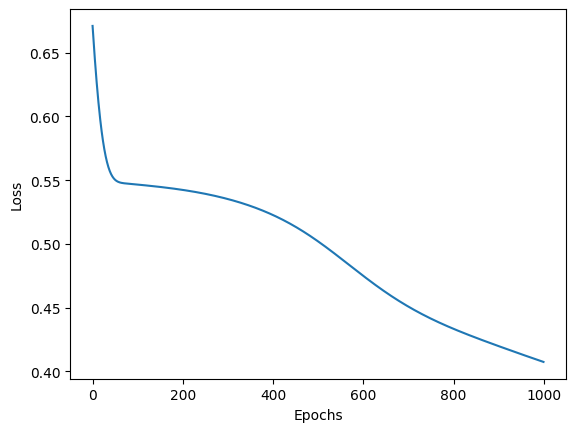

Training Losses are 
          0
0  0.802651
1  0.788576
2  0.774938
3  0.761745
4  0.749002
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2903  141]
 [ 599  357]]
Accuracy: 0.8150, Precision: 0.7169, Recall: 0.3734, F1-score: 0.4911

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2895  149]
 [ 597  359]]
Accuracy: 0.8135, Precision: 0.7067, Recall: 0.3755, F1-score: 0.4904



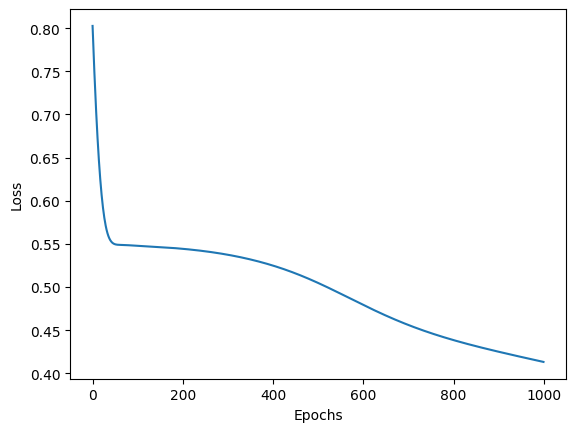

Training Losses are 
          0
0  0.678274
1  0.668794
2  0.659709
3  0.651024
4  0.642743
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2891  153]
 [ 478  478]]
Accuracy: 0.8423, Precision: 0.7575, Recall: 0.5000, F1-score: 0.6024

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2862  182]
 [ 473  483]]
Accuracy: 0.8363, Precision: 0.7263, Recall: 0.5052, F1-score: 0.5959



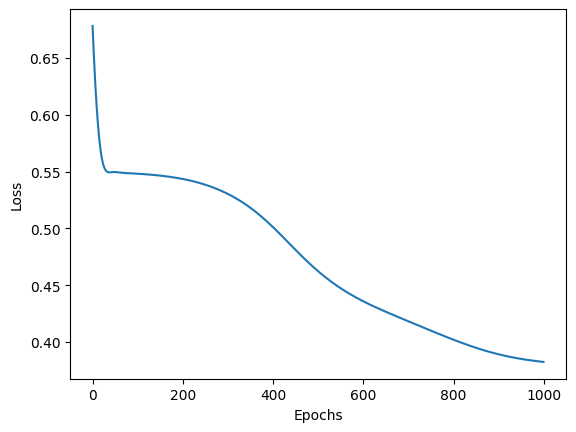

Training Losses are 
          0
0  0.862027
1  0.846203
2  0.830817
3  0.815878
4  0.801393
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2893  151]
 [ 588  368]]
Accuracy: 0.8153, Precision: 0.7091, Recall: 0.3849, F1-score: 0.4990

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2887  157]
 [ 587  369]]
Accuracy: 0.8140, Precision: 0.7015, Recall: 0.3860, F1-score: 0.4980



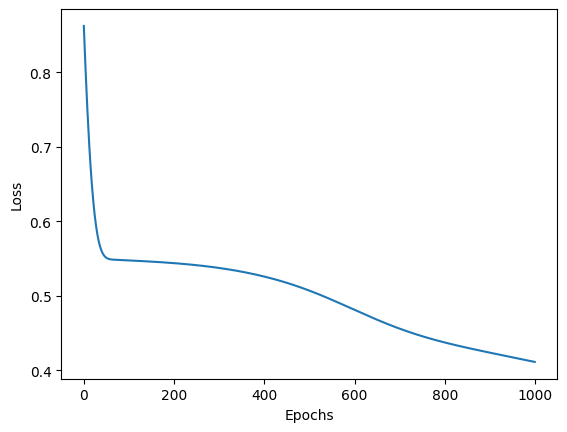

Training Losses are 
          0
0  0.776803
1  0.762876
2  0.749429
3  0.736467
4  0.723999
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2896  148]
 [ 553  403]]
Accuracy: 0.8247, Precision: 0.7314, Recall: 0.4215, F1-score: 0.5348

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2891  153]
 [ 553  403]]
Accuracy: 0.8235, Precision: 0.7248, Recall: 0.4215, F1-score: 0.5331



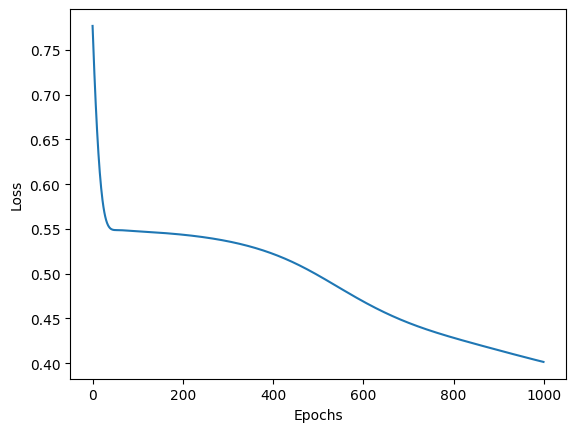

Training Losses are 
          0
0  0.682360
1  0.679661
2  0.676997
3  0.674369
4  0.671777
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2924  120]
 [ 658  298]]
Accuracy: 0.8055, Precision: 0.7129, Recall: 0.3117, F1-score: 0.4338

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2926  118]
 [ 655  301]]
Accuracy: 0.8067, Precision: 0.7184, Recall: 0.3149, F1-score: 0.4378



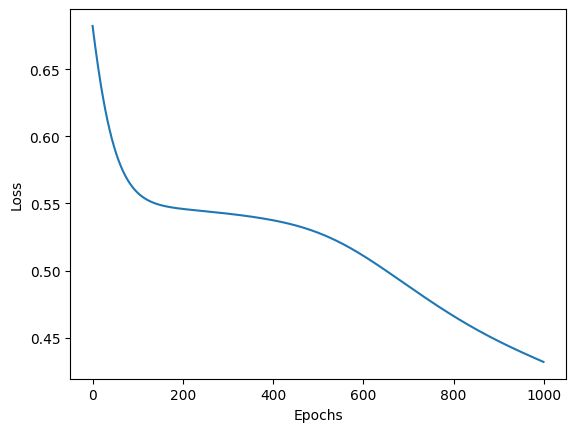

Training Losses are 
          0
0  0.689795
1  0.687354
2  0.684935
3  0.682536
4  0.680158
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2941  103]
 [ 675  281]]
Accuracy: 0.8055, Precision: 0.7318, Recall: 0.2939, F1-score: 0.4194

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2947   97]
 [ 685  271]]
Accuracy: 0.8045, Precision: 0.7364, Recall: 0.2835, F1-score: 0.4094



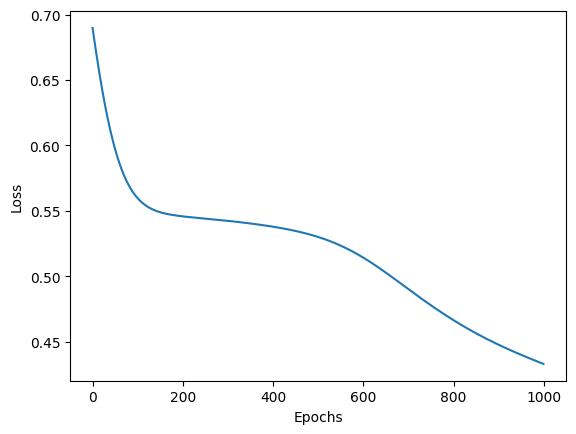

Training Losses are 
          0
0  0.631410
1  0.629588
2  0.627790
3  0.626016
4  0.624268
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2934  110]
 [ 576  380]]
Accuracy: 0.8285, Precision: 0.7755, Recall: 0.3975, F1-score: 0.5256

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2917  127]
 [ 575  381]]
Accuracy: 0.8245, Precision: 0.7500, Recall: 0.3985, F1-score: 0.5205



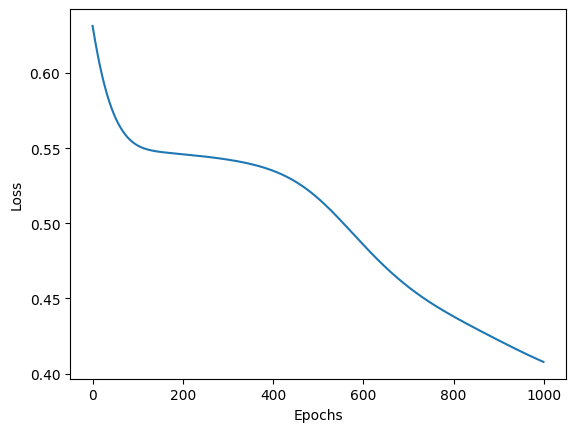

Training Losses are 
          0
0  0.716243
1  0.713702
2  0.711181
3  0.708681
4  0.706202
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2947   97]
 [ 694  262]]
Accuracy: 0.8023, Precision: 0.7298, Recall: 0.2741, F1-score: 0.3985

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2954   90]
 [ 699  257]]
Accuracy: 0.8027, Precision: 0.7406, Recall: 0.2688, F1-score: 0.3945



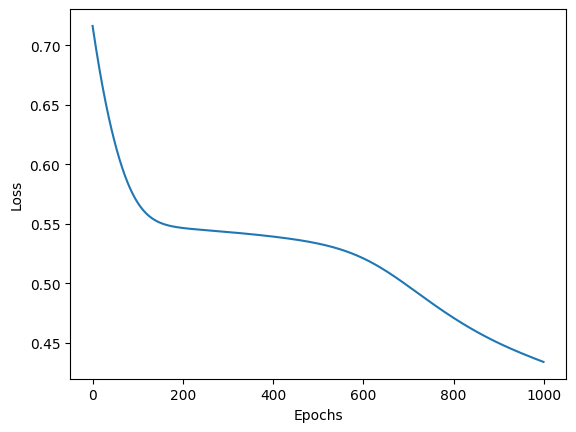

Training Losses are 
          0
0  0.777734
1  0.771688
2  0.765728
3  0.759853
4  0.754067
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2900  144]
 [ 632  324]]
Accuracy: 0.8060, Precision: 0.6923, Recall: 0.3389, F1-score: 0.4551

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2911  133]
 [ 632  324]]
Accuracy: 0.8087, Precision: 0.7090, Recall: 0.3389, F1-score: 0.4586



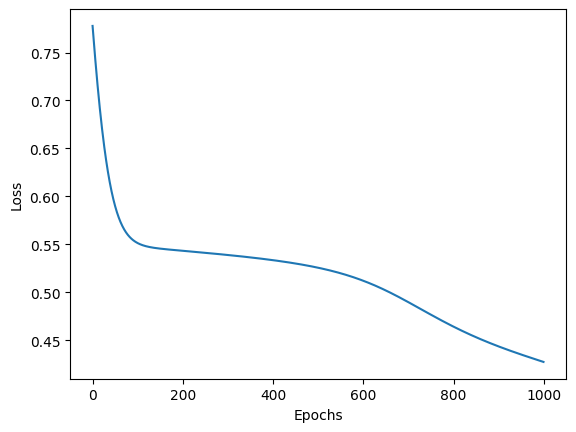

Training Losses are 
          0
0  0.697930
1  0.693136
2  0.688428
3  0.683809
4  0.679278
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2893  151]
 [ 574  382]]
Accuracy: 0.8187, Precision: 0.7167, Recall: 0.3996, F1-score: 0.5131

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2889  155]
 [ 562  394]]
Accuracy: 0.8207, Precision: 0.7177, Recall: 0.4121, F1-score: 0.5236



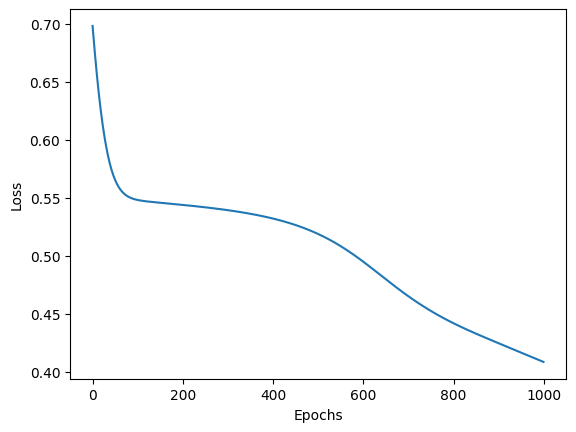

Training Losses are 
          0
0  0.610242
1  0.607400
2  0.604625
3  0.601918
4  0.599280
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2885  159]
 [ 477  479]]
Accuracy: 0.8410, Precision: 0.7508, Recall: 0.5010, F1-score: 0.6010

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2861  183]
 [ 467  489]]
Accuracy: 0.8375, Precision: 0.7277, Recall: 0.5115, F1-score: 0.6007



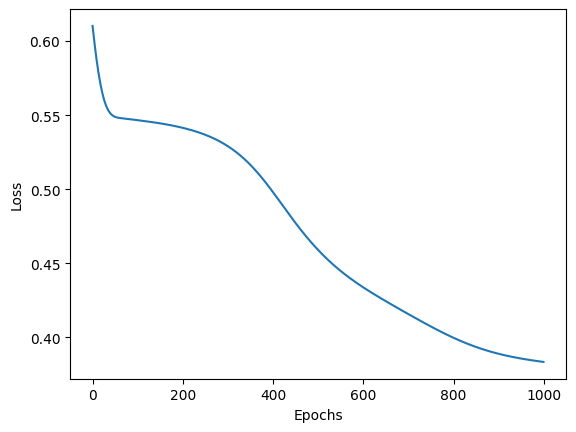

Training Losses are 
          0
0  0.778348
1  0.773665
2  0.769044
3  0.764487
4  0.759995
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2920  124]
 [ 665  291]]
Accuracy: 0.8027, Precision: 0.7012, Recall: 0.3044, F1-score: 0.4245

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2933  111]
 [ 668  288]]
Accuracy: 0.8053, Precision: 0.7218, Recall: 0.3013, F1-score: 0.4251



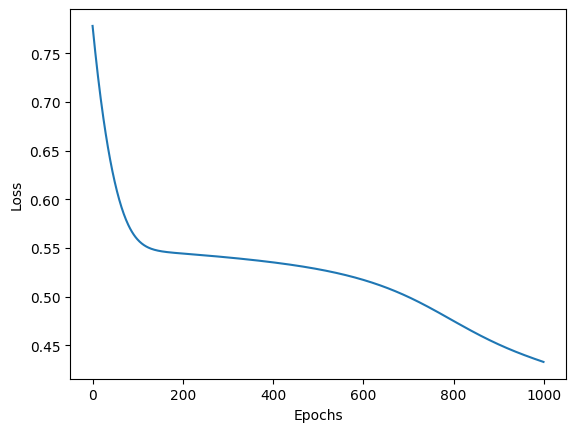

Training Losses are 
          0
0  0.697201
1  0.689896
2  0.682793
3  0.675893
4  0.669201
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2893  151]
 [ 490  466]]
Accuracy: 0.8397, Precision: 0.7553, Recall: 0.4874, F1-score: 0.5925

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2867  177]
 [ 477  479]]
Accuracy: 0.8365, Precision: 0.7302, Recall: 0.5010, F1-score: 0.5943



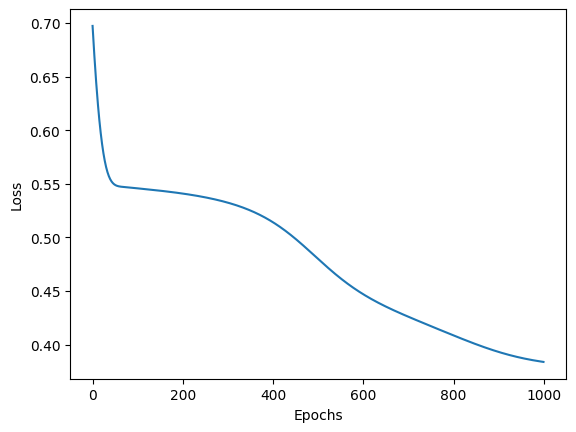

Training Losses are 
          0
0  0.788691
1  0.779266
2  0.770061
3  0.761078
4  0.752320
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2895  149]
 [ 609  347]]
Accuracy: 0.8105, Precision: 0.6996, Recall: 0.3630, F1-score: 0.4780

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2898  146]
 [ 608  348]]
Accuracy: 0.8115, Precision: 0.7045, Recall: 0.3640, F1-score: 0.4800



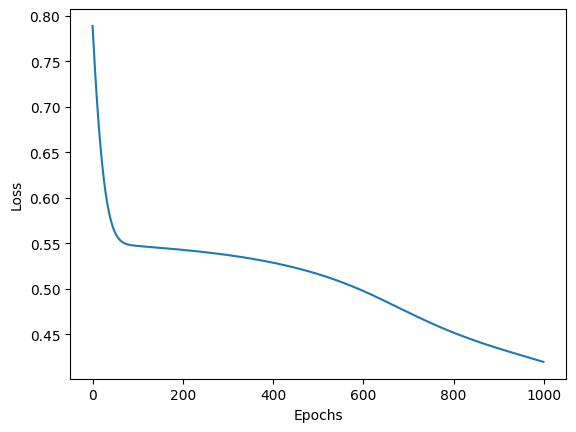

Training Losses are 
          0
0  0.622079
1  0.616960
2  0.612042
3  0.607329
4  0.602824
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2864  180]
 [ 456  500]]
Accuracy: 0.8410, Precision: 0.7353, Recall: 0.5230, F1-score: 0.6112

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2846  198]
 [ 457  499]]
Accuracy: 0.8363, Precision: 0.7159, Recall: 0.5220, F1-score: 0.6038



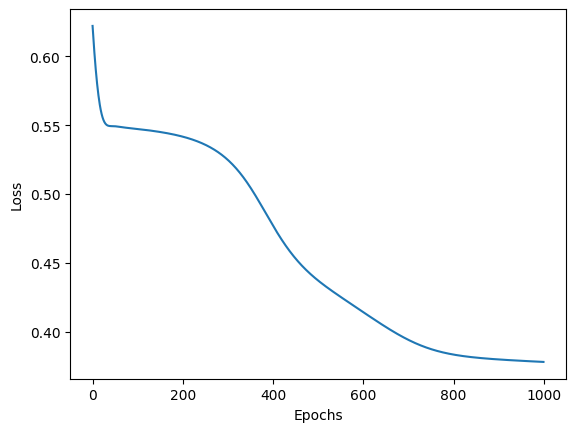

Training Losses are 
          0
0  0.760469
1  0.751894
2  0.743530
3  0.735376
4  0.727432
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2902  142]
 [ 529  427]]
Accuracy: 0.8323, Precision: 0.7504, Recall: 0.4467, F1-score: 0.5600

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2884  160]
 [ 527  429]]
Accuracy: 0.8283, Precision: 0.7284, Recall: 0.4487, F1-score: 0.5553



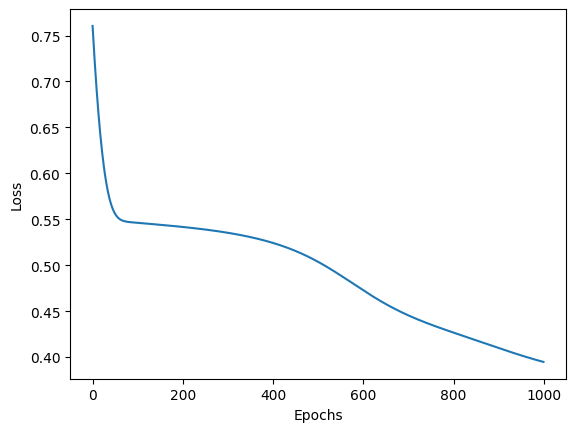

Training Losses are 
          0
0  0.755135
1  0.739462
2  0.724454
3  0.710124
4  0.696480
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2889  155]
 [ 481  475]]
Accuracy: 0.8410, Precision: 0.7540, Recall: 0.4969, F1-score: 0.5990

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2866  178]
 [ 474  482]]
Accuracy: 0.8370, Precision: 0.7303, Recall: 0.5042, F1-score: 0.5965



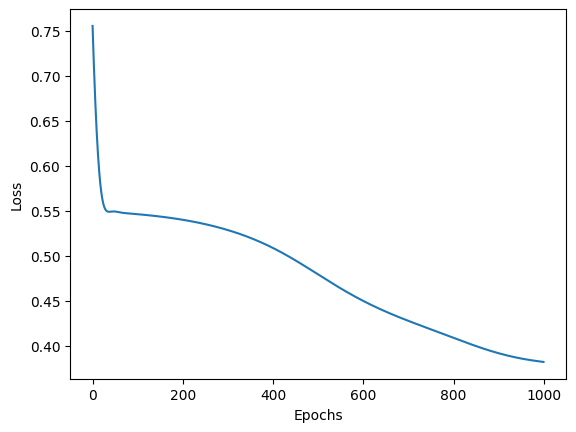

Training Losses are 
          0
0  0.849729
1  0.830723
2  0.812369
3  0.794680
4  0.777669
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2896  148]
 [ 502  454]]
Accuracy: 0.8375, Precision: 0.7542, Recall: 0.4749, F1-score: 0.5828

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2876  168]
 [ 493  463]]
Accuracy: 0.8347, Precision: 0.7338, Recall: 0.4843, F1-score: 0.5835



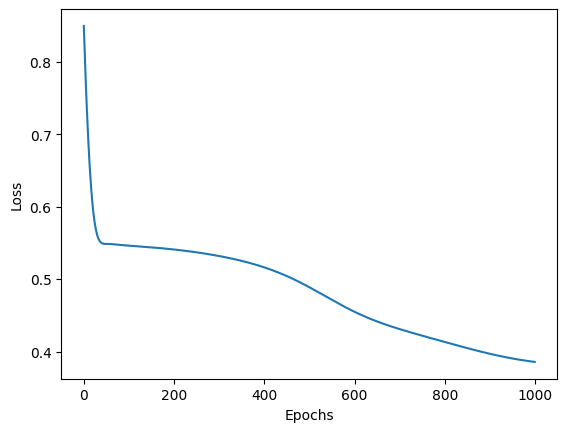

Training Losses are 
          0
0  0.794203
1  0.777475
2  0.761376
3  0.745919
4  0.731116
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2896  148]
 [ 510  446]]
Accuracy: 0.8355, Precision: 0.7508, Recall: 0.4665, F1-score: 0.5755

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2879  165]
 [ 497  459]]
Accuracy: 0.8345, Precision: 0.7356, Recall: 0.4801, F1-score: 0.5810



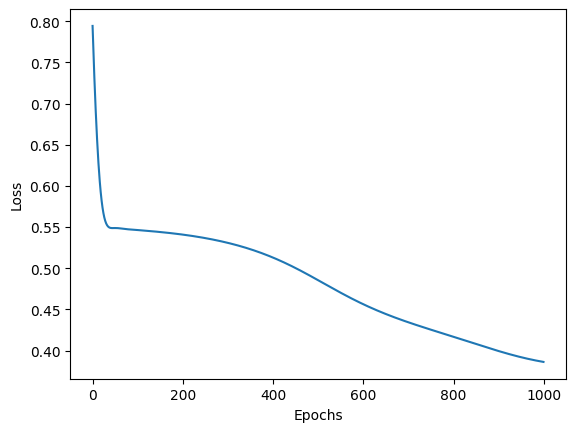

Training Losses are 
          0
0  0.712717
1  0.698644
2  0.685248
3  0.672542
4  0.660534
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2861  183]
 [ 459  497]]
Accuracy: 0.8395, Precision: 0.7309, Recall: 0.5199, F1-score: 0.6076

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2846  198]
 [ 458  498]]
Accuracy: 0.8360, Precision: 0.7155, Recall: 0.5209, F1-score: 0.6029



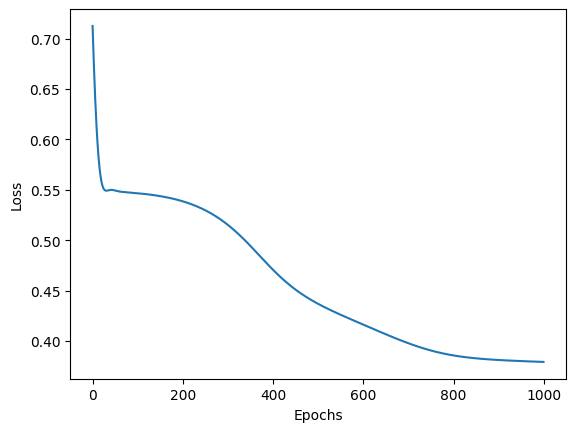

Training Losses are 
          0
0  0.784646
1  0.779555
2  0.774514
3  0.769526
4  0.764594
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2929  115]
 [ 639  317]]
Accuracy: 0.8115, Precision: 0.7338, Recall: 0.3316, F1-score: 0.4568

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2925  119]
 [ 639  317]]
Accuracy: 0.8105, Precision: 0.7271, Recall: 0.3316, F1-score: 0.4555



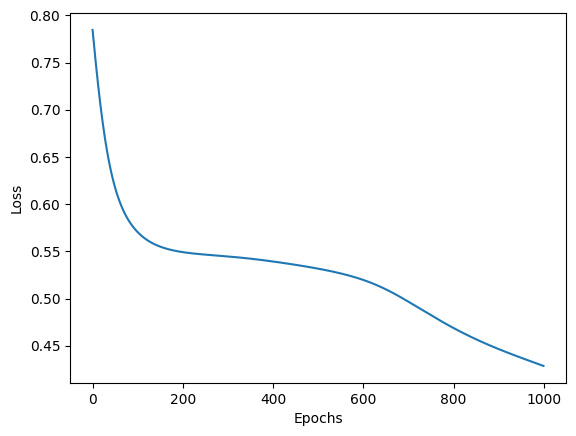

Training Losses are 
          0
0  0.739082
1  0.734641
2  0.730263
3  0.725949
4  0.721701
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2917  127]
 [ 652  304]]
Accuracy: 0.8053, Precision: 0.7053, Recall: 0.3180, F1-score: 0.4384

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2921  123]
 [ 648  308]]
Accuracy: 0.8073, Precision: 0.7146, Recall: 0.3222, F1-score: 0.4441



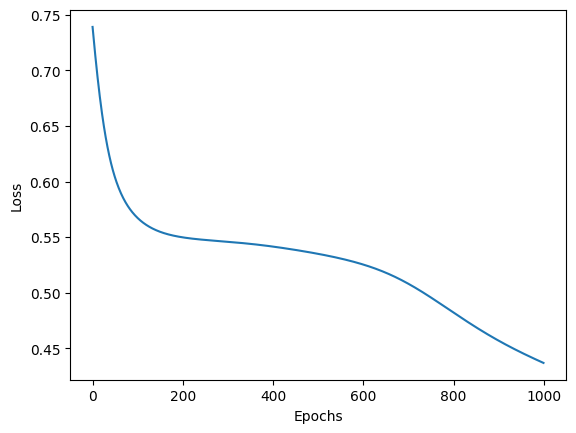

Training Losses are 
          0
0  0.624306
1  0.620838
2  0.617453
3  0.614155
4  0.610946
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2872  172]
 [ 462  494]]
Accuracy: 0.8415, Precision: 0.7417, Recall: 0.5167, F1-score: 0.6091

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2847  197]
 [ 456  500]]
Accuracy: 0.8367, Precision: 0.7174, Recall: 0.5230, F1-score: 0.6050



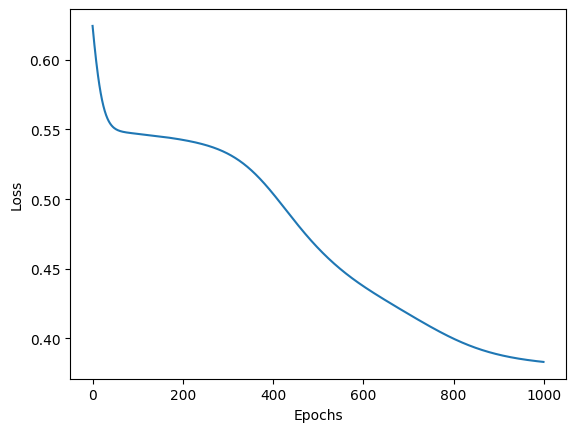

Training Losses are 
          0
0  0.736276
1  0.730984
2  0.725783
3  0.720674
4  0.715661
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2902  142]
 [ 599  357]]
Accuracy: 0.8147, Precision: 0.7154, Recall: 0.3734, F1-score: 0.4907

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2897  147]
 [ 599  357]]
Accuracy: 0.8135, Precision: 0.7083, Recall: 0.3734, F1-score: 0.4890



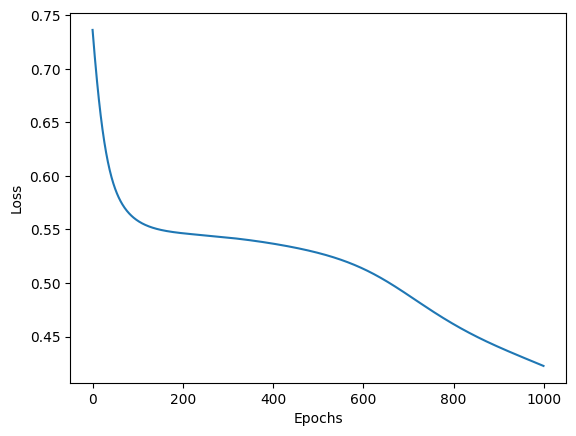

Training Losses are 
          0
0  0.758692
1  0.752151
2  0.745716
3  0.739391
4  0.733177
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2900  144]
 [ 509  447]]
Accuracy: 0.8367, Precision: 0.7563, Recall: 0.4676, F1-score: 0.5779

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2884  160]
 [ 496  460]]
Accuracy: 0.8360, Precision: 0.7419, Recall: 0.4812, F1-score: 0.5838



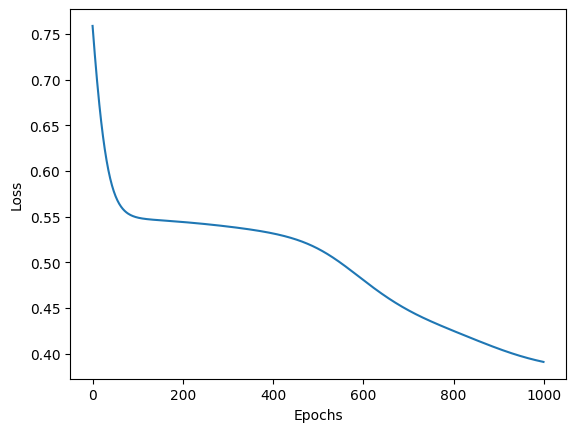

Training Losses are 
          0
0  0.605756
1  0.602158
2  0.598677
3  0.595318
4  0.592083
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2861  183]
 [ 457  499]]
Accuracy: 0.8400, Precision: 0.7317, Recall: 0.5220, F1-score: 0.6093

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2848  196]
 [ 448  508]]
Accuracy: 0.8390, Precision: 0.7216, Recall: 0.5314, F1-score: 0.6120



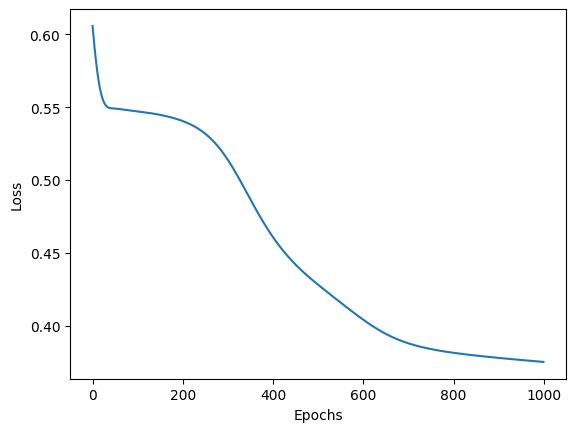

Training Losses are 
          0
0  0.689095
1  0.683120
2  0.677283
3  0.671587
4  0.666037
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2880  164]
 [ 474  482]]
Accuracy: 0.8405, Precision: 0.7461, Recall: 0.5042, F1-score: 0.6017

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2861  183]
 [ 464  492]]
Accuracy: 0.8383, Precision: 0.7289, Recall: 0.5146, F1-score: 0.6033



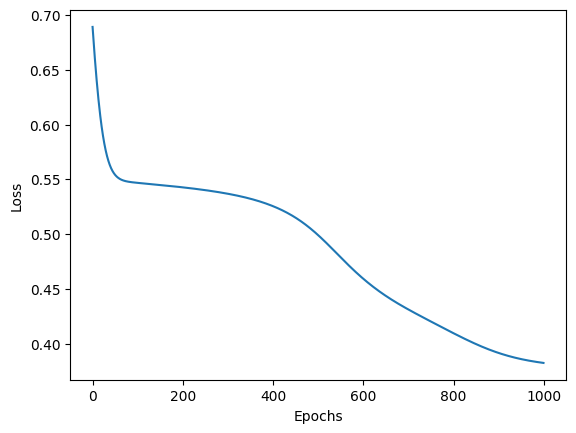

Training Losses are 
          0
0  0.782627
1  0.773230
2  0.764075
3  0.755167
4  0.746509
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2893  151]
 [ 576  380]]
Accuracy: 0.8183, Precision: 0.7156, Recall: 0.3975, F1-score: 0.5111

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2889  155]
 [ 566  390]]
Accuracy: 0.8197, Precision: 0.7156, Recall: 0.4079, F1-score: 0.5197



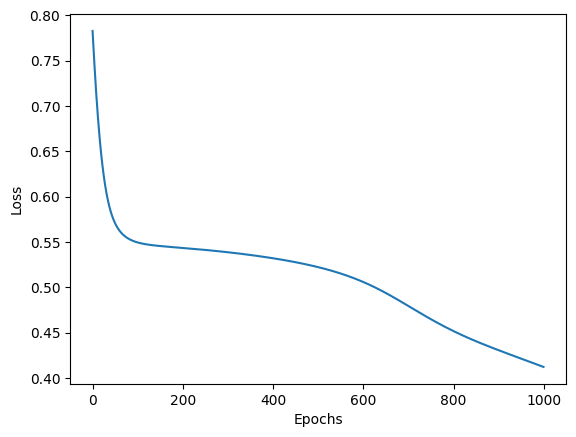

Training Losses are 
          0
0  0.645415
1  0.637640
2  0.630211
3  0.623137
4  0.616421
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2863  181]
 [ 459  497]]
Accuracy: 0.8400, Precision: 0.7330, Recall: 0.5199, F1-score: 0.6083

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2848  196]
 [ 450  506]]
Accuracy: 0.8385, Precision: 0.7208, Recall: 0.5293, F1-score: 0.6104



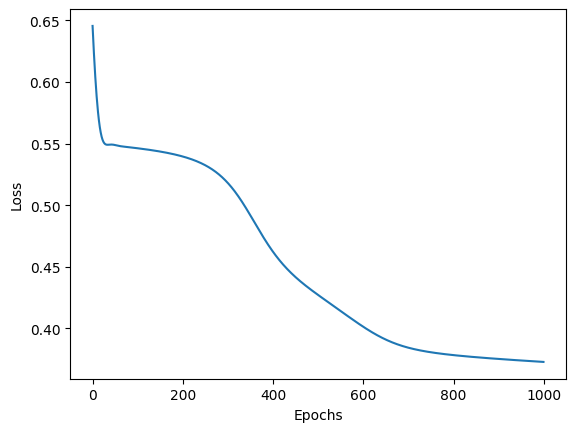

Training Losses are 
          0
0  0.769311
1  0.755376
2  0.741936
3  0.729004
4  0.716589
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2873  171]
 [ 459  497]]
Accuracy: 0.8425, Precision: 0.7440, Recall: 0.5199, F1-score: 0.6121

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2849  195]
 [ 460  496]]
Accuracy: 0.8363, Precision: 0.7178, Recall: 0.5188, F1-score: 0.6023



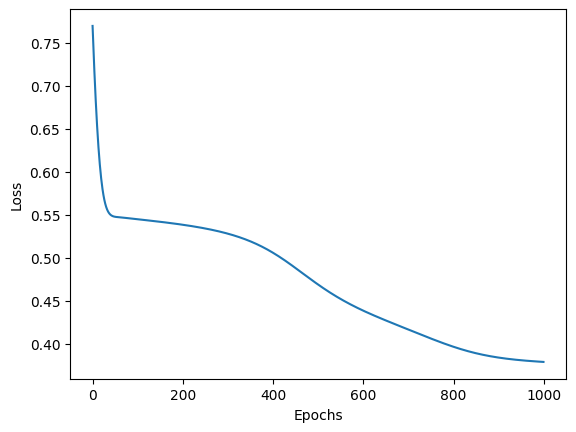

Training Losses are 
          0
0  0.733871
1  0.720945
2  0.708537
3  0.696658
4  0.685316
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2865  179]
 [ 459  497]]
Accuracy: 0.8405, Precision: 0.7352, Recall: 0.5199, F1-score: 0.6091

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2852  192]
 [ 460  496]]
Accuracy: 0.8370, Precision: 0.7209, Recall: 0.5188, F1-score: 0.6034



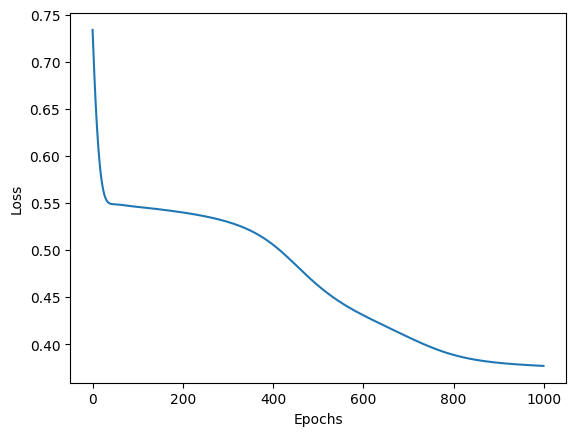

Training Losses are 
          0
0  0.753712
1  0.740305
2  0.727386
3  0.714966
4  0.703055
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2871  173]
 [ 461  495]]
Accuracy: 0.8415, Precision: 0.7410, Recall: 0.5178, F1-score: 0.6096

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2847  197]
 [ 462  494]]
Accuracy: 0.8353, Precision: 0.7149, Recall: 0.5167, F1-score: 0.5999



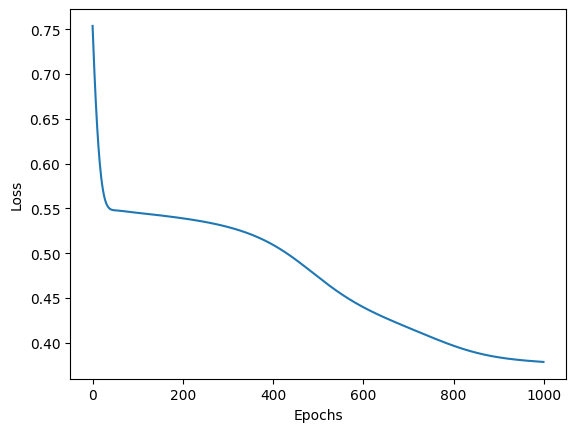

Training Losses are 
          0
0  0.817204
1  0.793498
2  0.770996
3  0.749722
4  0.729693
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2859  185]
 [ 457  499]]
Accuracy: 0.8395, Precision: 0.7295, Recall: 0.5220, F1-score: 0.6085

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2842  202]
 [ 455  501]]
Accuracy: 0.8357, Precision: 0.7127, Recall: 0.5241, F1-score: 0.6040



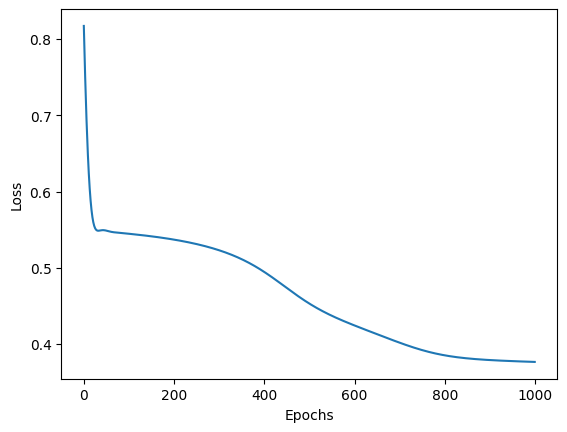

Training Losses are 
          0
0  0.669173
1  0.654464
2  0.640829
3  0.628275
4  0.616801
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2861  183]
 [ 460  496]]
Accuracy: 0.8393, Precision: 0.7305, Recall: 0.5188, F1-score: 0.6067

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2845  199]
 [ 448  508]]
Accuracy: 0.8383, Precision: 0.7185, Recall: 0.5314, F1-score: 0.6109



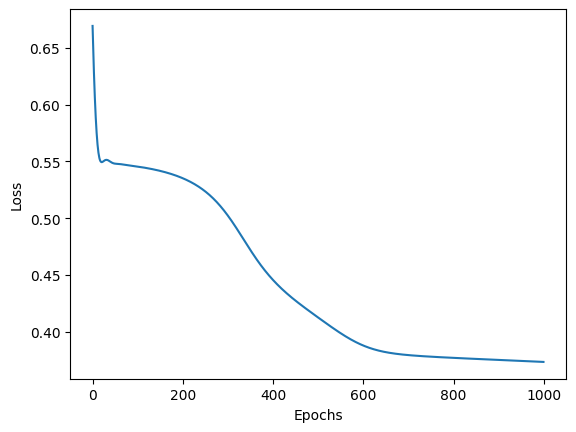

Training Losses are 
          0
0  0.745307
1  0.725547
2  0.706897
3  0.689382
4  0.673023
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2860  184]
 [ 453  503]]
Accuracy: 0.8407, Precision: 0.7322, Recall: 0.5262, F1-score: 0.6123

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2842  202]
 [ 445  511]]
Accuracy: 0.8383, Precision: 0.7167, Recall: 0.5345, F1-score: 0.6123



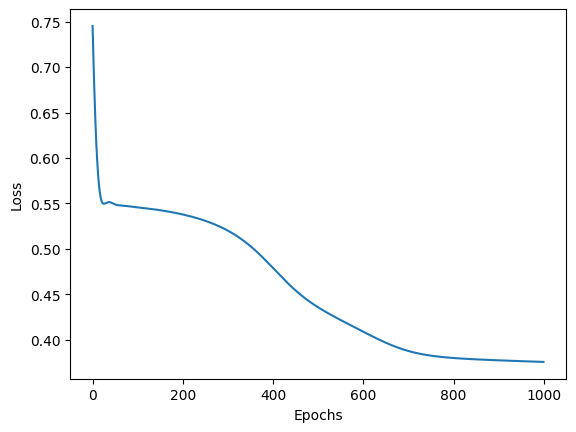

Training Losses are 
          0
0  0.738251
1  0.719367
2  0.701552
3  0.684826
4  0.669202
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2859  185]
 [ 457  499]]
Accuracy: 0.8395, Precision: 0.7295, Recall: 0.5220, F1-score: 0.6085

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2845  199]
 [ 450  506]]
Accuracy: 0.8377, Precision: 0.7177, Recall: 0.5293, F1-score: 0.6093



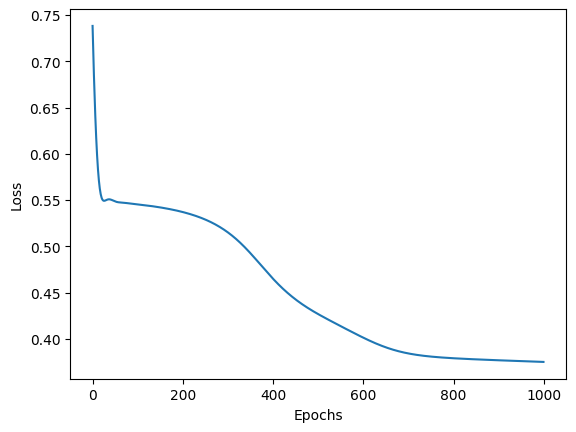

The best accuracy on test data is 0.839 for layers 64 , 16, 16


In [19]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(15,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")